# Ford GoBike System Data
## by EzzElddin AbdAllah

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [28]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [29]:
# read the data
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [30]:
df.shape

(183412, 16)

In [31]:
# drop nan values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [32]:
# check duplicates
df.duplicated().sum()

0

### What is the structure of the dataset?

> 183412 rows, by columns

### What is/are the main feature(s) of interest in the dataset?

> `duration_sec`, `start_station_name`, `end_station_name`, `user_type`, `member_birth_year`, `member_gender`

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> `duration_sec`, `start_station_name`, `end_station_name`, `user_type`, `member_birth_year`, `member_gender`

## Calculate the age, and insert it as a column

In [33]:
df['age'] = 2019 - df.member_birth_year

In [34]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,34.196865
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,18.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,27.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,32.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,39.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,141.000000


## Univariate Exploration

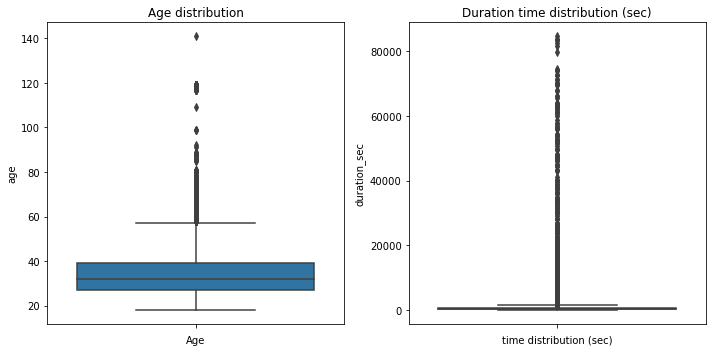

In [35]:
default_color = sns.color_palette()[0]
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].title.set_text('Age distribution')
ax[0].set_xlabel('Age')
sns.boxplot(data=df, y='age', ax=ax[0])
ax[1].title.set_text('Duration time distribution (sec)')
ax[1].set_xlabel('time distribution (sec)')
sns.boxplot(data=df, y='duration_sec', ax=ax[1])
fig.tight_layout();

In [36]:
df.age.quantile(0.9), df.duration_sec.quantile(0.9)

(49.0, 1161.0)

### in the age distribution we can see that 90% of users are between 18 to 49, while in the duration distribution 90% are between 60 to 1160 seconds, otherwise are considered outliers.

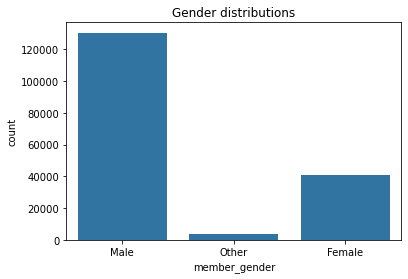

In [37]:
sns.countplot(data=df, x='member_gender', color=default_color)
plt.title('Gender distributions');

In [38]:
(df.member_gender == 'Other').sum() / df.shape[0] * 100

2.0845717682564358

## there's 2% of user's gender is `other` so we also consider them as outliers.

In [39]:
df = df[(df.age < 50) & (df.duration_sec < 1162) & (df.member_gender != 'Other')]
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age
count,140591.000000,140591.000000,140591.000000,140591.000000,140591.000000,140591.000000,140591.000000,140591.000000,140591.000000,140591.000000
mean,510.723218,139.746321,37.768894,-122.348120,136.539096,37.769045,-122.347568,4497.659253,1987.139618,31.860382
std,257.049557,110.733787,0.105751,0.122555,109.855208,0.105658,0.122057,1646.454689,6.966089,6.966089
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1970.000000,18.000000
25%,305.000000,50.000000,37.770030,-122.411738,47.000000,37.770407,-122.411306,3852.000000,1983.000000,26.000000
50%,469.000000,104.000000,37.780526,-122.397405,101.000000,37.780760,-122.397086,4963.000000,1988.000000,31.000000
75%,686.000000,239.000000,37.797320,-122.276040,238.000000,37.797320,-122.279352,5508.000000,1993.000000,36.000000
max,1161.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,49.000000


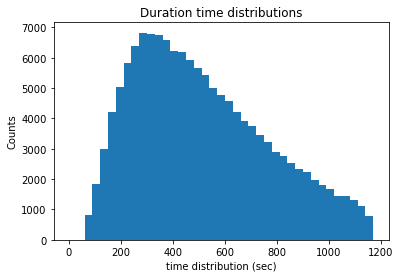

In [40]:
binsize = 30
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.hist(df.duration_sec, bins=bins)
plt.xlabel('time distribution (sec)')
plt.ylabel('Counts')
plt.title('Duration time distributions');

## in the duration distribution most values are concentrated between 200 to 500 seconds

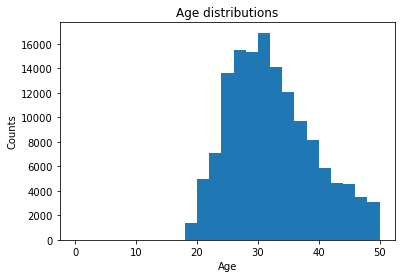

In [41]:
binsize = 2
bins = np.arange(0, df['age'].max()+binsize, binsize)

plt.hist(df.age, bins=bins)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Age distributions');

## while most user's age are between 25 to 35

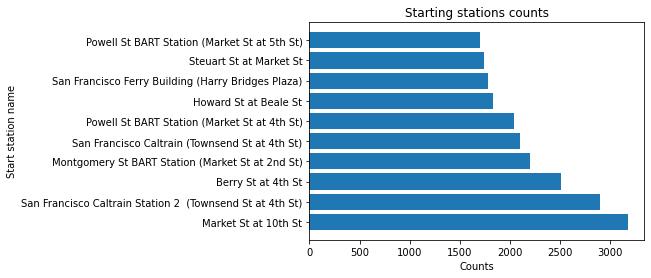

In [42]:
plt.barh(y=df.start_station_name.value_counts().iloc[:10].index, width=df.start_station_name.value_counts().iloc[:10].values, color = default_color);
plt.ylabel('Start station name')
plt.xlabel('Counts')
plt.title('Starting stations counts');

## top 10 favored starting station

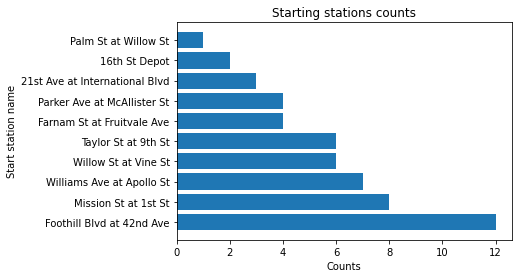

In [43]:
plt.barh(y=df.start_station_name.value_counts().iloc[-10:].index, width=df.start_station_name.value_counts().iloc[-10:].values, color = default_color);
plt.ylabel('Start station name')
plt.xlabel('Counts')
plt.title('Starting stations counts');

## least 10 favored starting station

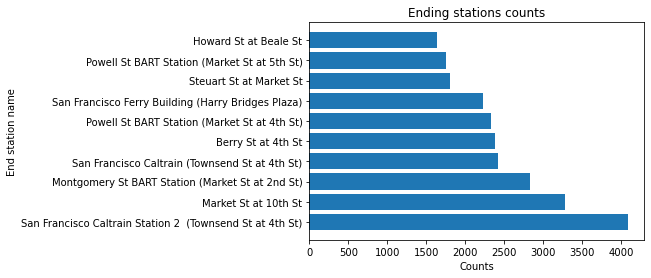

In [44]:
plt.barh(y=df.end_station_name.value_counts().iloc[:10].index, width=df.end_station_name.value_counts().iloc[:10].values, color = default_color);
plt.ylabel('End station name')
plt.xlabel('Counts')
plt.title('Ending stations counts');

## top 10 favored ending station

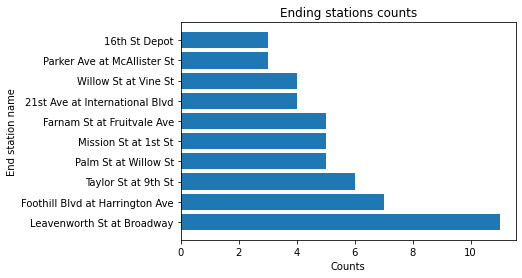

In [45]:
plt.barh(y=df.end_station_name.value_counts().iloc[-10:].index, width=df.end_station_name.value_counts().iloc[-10:].values, color = default_color);
plt.ylabel('End station name')
plt.xlabel('Counts')
plt.title('Ending stations counts');

## least 10 favored ending station

In [46]:
# create path column
df['path'] = df.start_station_name + ', ' +df.end_station_name
df['path']

6            Palm St at Willow St, San Jose Diridon Station
9                  Post St at Kearny St, Mission Playground
10        Jones St at Post St, San Francisco Public Libr...
11        Civic Center/UN Plaza BART Station (Market St ...
14        Bancroft Way at College Ave, Channing Way at S...
                                ...                        
183407    Beale St at Harrison St, Union Square (Powell ...
183408    Montgomery St BART Station (Market St at 2nd S...
183409    The Alameda at Bush St, Morrison Ave at Julian St
183410    San Pablo Ave at MLK Jr Way, San Pablo Ave at ...
183411           Spear St at Folsom St, 2nd St at Folsom St
Name: path, Length: 140591, dtype: object

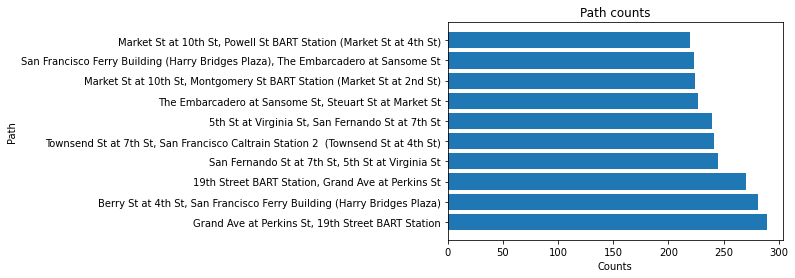

In [47]:
plt.barh(y=df.path.value_counts().iloc[:10].index, width=df.path.value_counts().iloc[:10].values, color = default_color);
plt.ylabel('Path')
plt.xlabel('Counts')
plt.title("Path counts");

## top 10 favored paths

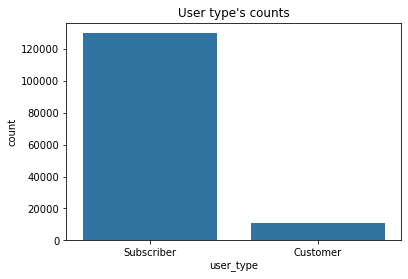

In [48]:
sns.countplot(data=df, x = 'user_type', color=default_color);
plt.title("User type's counts");

## most users are subscribed users

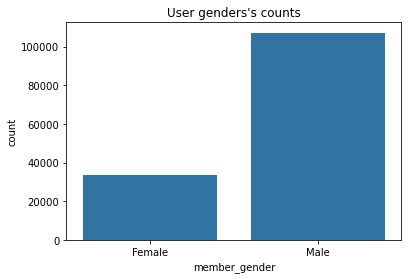

In [49]:
sns.countplot(data=df, x = 'member_gender', color=default_color);
plt.title("User genders's counts");

## most users are males

## Bivariate Exploration

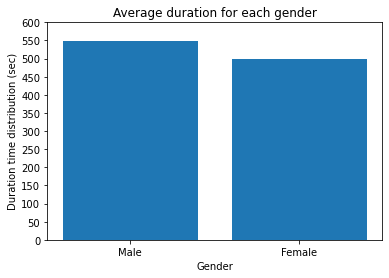

In [50]:
y_range = range(0, 650, 50)
plt.bar(height=df.groupby('member_gender').duration_sec.mean(), x=['Male', 'Female'])
plt.yticks(y_range)
plt.ylabel('Duration time distribution (sec)')
plt.xlabel('Gender')
plt.title("Average duration for each gender");

## males take a longer time rides than females

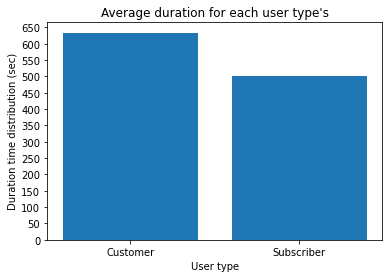

In [51]:
y_range = range(0, 700, 50)
plt.bar(height=df.groupby('user_type').duration_sec.mean(), x=['Customer', 'Subscriber'])
plt.yticks(y_range)
plt.ylabel('Duration time distribution (sec)')
plt.xlabel('User type')
plt.title("Average duration for each user type's");

## customer users takes a longer time rides than subscribed users

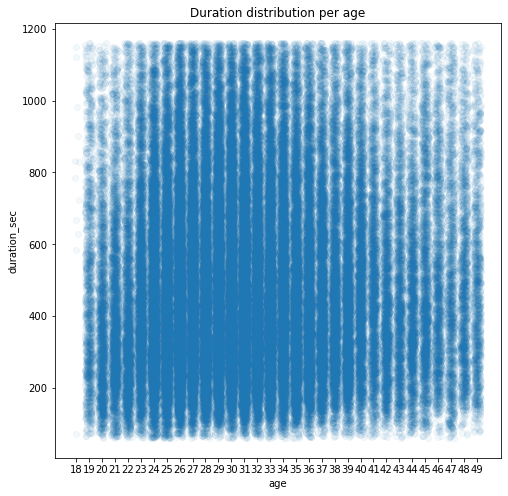

In [52]:
x_range = df.groupby('age').duration_sec.mean().index
plt.figure(figsize=(8,8))
sns.regplot(data=df, x='age', y='duration_sec', fit_reg=False, scatter_kws={'alpha':1/20},truncate=False, x_jitter=0.3)
plt.xticks(x_range)
plt.title("Duration distribution per age");

## most longer rides are from users with age between 24 to 34

## Multivariate Exploration

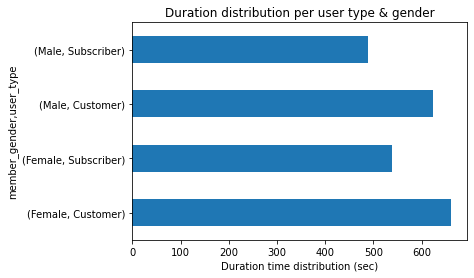

In [53]:
df.groupby(['member_gender', 'user_type']).duration_sec.mean().plot(kind='barh')
plt.xlabel('Duration time distribution (sec)')
plt.title('Duration distribution per user type & gender');

## with a deeper look, both female customer and female subscribed users, took a longer rides than both male customer and male subscribed users.